In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

df = pd.read_csv('./public_data/subwaytime.csv', header=[0,1] )
# print(df.head())
# print(df.columns)
# print(df)
hosun1 = []
# print(df.loc[2])
# print(df.index)

hosun_name = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선']

# df.set_index(['호선명'])

df.iloc[2][1]

'1호선'

In [30]:
commute_time_df = df.iloc[:,[1,3,11,13]]

commute_time_df

호선명               지하철역 Unnamed: 11_level_0  \
    Unnamed: 1_level_1 Unnamed: 3_level_1                  하차   
0                  1호선                서울역              105313   
1                  1호선                 시청               63969   
2                  1호선                 종각               98556   
3                  1호선               종로3가               23309   
4                  1호선               종로5가               38726   
..                 ...                ...                 ...   
616                신림선                 당곡                3345   
617                신림선                 신림                1313   
618                신림선                 서원                1166   
619                신림선            서울대벤처타운                5236   
620                신림선           관악산(서울대)                3502   

    Unnamed: 13_level_0  
                     하차  
0                218007  
1                182565  
2                244858  
3                 61562  
4                 90539  
..                  ...  
616                8281  
617                2640  
618                2085  
619                8763  
620                9833  

[621 rows x 4 columns]

In [31]:
ctd = commute_time_df.copy()
ctd
ctd.columns = ['호선명', '지하철명', '7-8시 하차', '8-9시 하차']
ctd

호선명      지하철명  7-8시 하차  8-9시 하차
0    1호선       서울역   105313   218007
1    1호선        시청    63969   182565
2    1호선        종각    98556   244858
3    1호선      종로3가    23309    61562
4    1호선      종로5가    38726    90539
..   ...       ...      ...      ...
616  신림선        당곡     3345     8281
617  신림선        신림     1313     2640
618  신림선        서원     1166     2085
619  신림선   서울대벤처타운     5236     8763
620  신림선  관악산(서울대)     3502     9833

[621 rows x 4 columns]

In [32]:
ctd['7-9시 하차'] = ctd['7-8시 하차'] + ctd['8-9시 하차']
ctd

호선명      지하철명  7-8시 하차  8-9시 하차  7-9시 하차
0    1호선       서울역   105313   218007   323320
1    1호선        시청    63969   182565   246534
2    1호선        종각    98556   244858   343414
3    1호선      종로3가    23309    61562    84871
4    1호선      종로5가    38726    90539   129265
..   ...       ...      ...      ...      ...
616  신림선        당곡     3345     8281    11626
617  신림선        신림     1313     2640     3953
618  신림선        서원     1166     2085     3251
619  신림선   서울대벤처타운     5236     8763    13999
620  신림선  관악산(서울대)     3502     9833    13335

[621 rows x 5 columns]

In [40]:
max_station = []
max = 0
maxlist = []


for hn in hosun_name:
    
    hosunmyung = ctd['호선명']== hn
    hosunDF = ctd[hosunmyung]
    
    max = hosunDF.sort_values('7-9시 하차', ascending=False).iloc[0]
    max_station.append(max[1])
    maxlist.append(max[4])
max_station, maxlist

(['종각', '역삼', '양재(서초구청)', '충무로', '여의도', '공덕', '가산디지털단지'],
 [343414, 448033, 308476, 221021, 334282, 129775, 481268])

In [34]:
for i in range(0,7):
    print(f'출근 시간대 {i+1}호선 최대 하차역: {max_station[i]}역, 하차인원: {maxlist[i]:,}명')

출근 시간대 1호선 최대 하차역: 종각역, 하차인원: 343,414명
출근 시간대 2호선 최대 하차역: 역삼역, 하차인원: 448,033명
출근 시간대 3호선 최대 하차역: 양재(서초구청)역, 하차인원: 308,476명
출근 시간대 4호선 최대 하차역: 충무로역, 하차인원: 221,021명
출근 시간대 5호선 최대 하차역: 여의도역, 하차인원: 334,282명
출근 시간대 6호선 최대 하차역: 공덕역, 하차인원: 129,775명
출근 시간대 7호선 최대 하차역: 가산디지털단지역, 하차인원: 481,268명


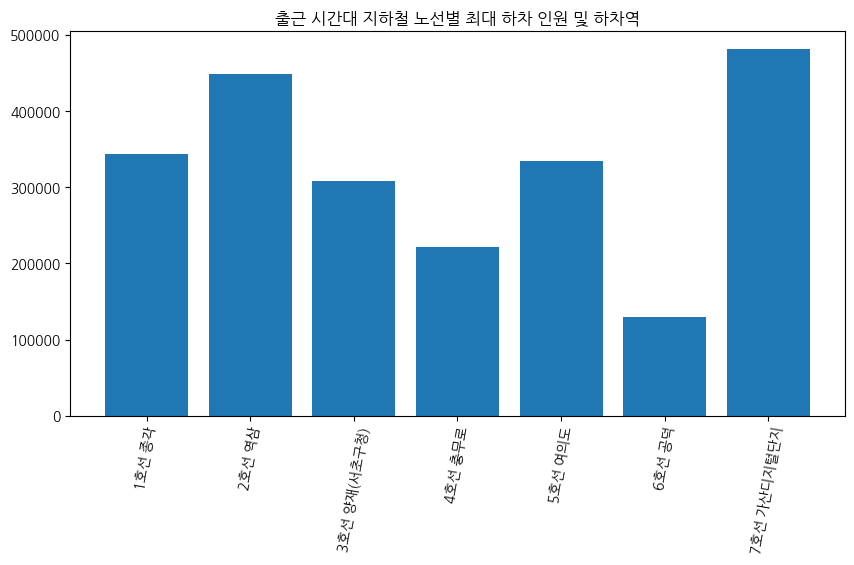

In [39]:
label = [hosun_name[i] + ' ' + max_station[i] for i in range(7)]
plt.figure(figsize=(10,5))
plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역')
plt.bar(hosun_name, maxlist)
plt.xticks(hosun_name, label, rotation=80)
plt.show()

In [36]:
# hosun1 = [0]
# hosun2 = [0]
# hosun3 = [0]
# hosun4 = [0]
# hosun5 = [0]
# hosun6 = [0]
# hosun7 = [0]

# max_station = [""]
# max = 0
# maxlist = [0]*7


# # max_number = commute_time_df.max()
# # max_number.idxmax, max_number.max

# for j in hosun_name:
#     for k in range(7):
#         for i in range(621):
#                 if commute_time_df.iloc[i][0] == j:
#                     if commute_time_df.iloc[i][2] > max:
#                         max = commute_time_df[i][2]
#                         maxlist[k] = max
#                         max=0

# commute_time_df.iloc[0][1]